In [1]:
import numpy as np;
import scipy as sp;
import matplotlib.pyplot as plt
from scipy import signal

In [2]:
#Zadatak 1: 
#a) Nacrtati Bodeov dijagram funkcije prenosa W(s)=1/s(s+1)
#b) Oderediti brzinsku konstantu, presecnu ucestanost pojacanja, presecnu ucestanost faze i faznu i amplitudsku marginu
#c) Dizajnirati integralni kompenzator koji obezbedjuje brzinsku konstantu > 10, i faznu marginu >45 stepeni
#d) Nacrtati finalni Bodeov dijagram funkcije prenosa D(s)W(s) i proveriti da li su ispunjene specifikacije
#e) Nacrtati odskocne i nagibne odzive kompenzovanog i nekompenzovanog sistema sa zatvorenom povratnom spregom

In [3]:
W=signal.lti([], [0, -1], 1)

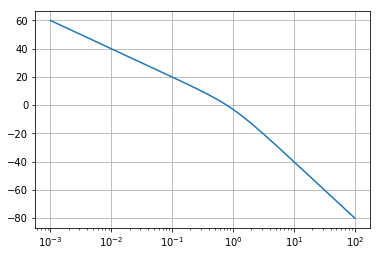

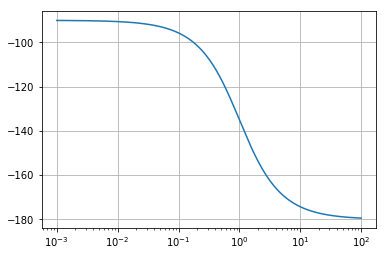

In [4]:
# a)
w_log=np.logspace(-3,2,num=100000)
w, mag, phase = signal.bode(W,w=w_log)
plt.figure()
plt.grid()
plt.semilogx(w, mag)    # Bode amplitudska karakteristika
plt.figure()
plt.grid()
plt.semilogx(w, phase)  # Bode fazna karakteristika
plt.show()

In [5]:
# b) brzinska konstanta
Kv=1

In [6]:
# presecna ucestanost pojacanja
w1=w[mag[:]>=0][-1]
print("Presecna ucestanost pojacanja:",round(w1,2))

Presecna ucestanost pojacanja: 0.79


In [7]:
#fazna margina
PM=180+phase[mag[:]>=0][-1]
print("Fazna margina:",round(PM,2))

Fazna margina: 51.83


In [8]:
# presecna ucestanost faze je beskonacna 
w_pi=w[phase[:]>=-180][-1]
print("Presecna ucestanost faze:",round(w_pi,2))

Presecna ucestanost faze: 100.0


In [9]:
# amplitudska margina je beskonacna
d=1/10**((mag[phase[:]>=-180][-1])/20)
print("Amplitudska margina:",round(d,2))

Amplitudska margina: 10000.5


In [10]:
#c) # Trazimo kontroler C(s)=K*alpha(s/z+1)/(s/p+1), p=z/alpha 
# I nacin : Trazimo pojacanje K za koje je fazna margina za oko 10 stepeni veca od trazene:
mag_PM=mag[phase[:]>=-180+55][-1]
K=1/(10**(mag_PM/20))
print("Pojacanje za koje je PM 55 je",round(K,1))

Pojacanje za koje je PM 55 je 0.9


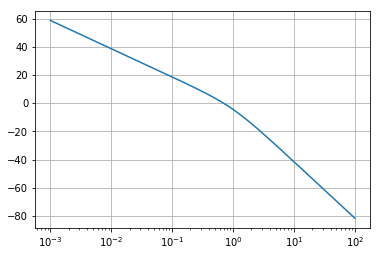

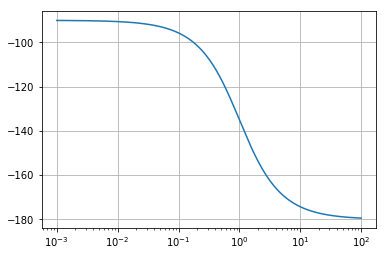

In [11]:
# Bodeov dijagram za KW(s):
W1=signal.lti([], [0, -1], K)
w, mag, phase = signal.bode(W1,w=w_log)
plt.figure()
plt.grid()
plt.semilogx(w, mag)    # Bode amplitudska karakteristika
plt.figure()
plt.grid()
plt.semilogx(w, phase)  # Bode fazna karakteristika
plt.show()

In [12]:
# presecna ucestanost pojacanja
w1=w[mag[:]>=0][-1]
print("Presecna ucestanost pojacanja:",round(w1,2))

Presecna ucestanost pojacanja: 0.7


In [13]:
#fazna margina
PM=180+phase[mag[:]>=0][-1]
print("Fazna margina:",round(PM,2))

Fazna margina: 55.01


In [14]:
# Da bismo dobili trazenu brzinsku konstantu 10, alpha treba da bude 10/K
alpha=10/K
alpha

11.700433876328718

In [15]:
# probamo nulu z npr. 5 puta manju od w1, znaci pol je p=z/alpha
z=w1/5
p=z/alpha
z,p

(0.14000980377850572, 0.01196620614742853)

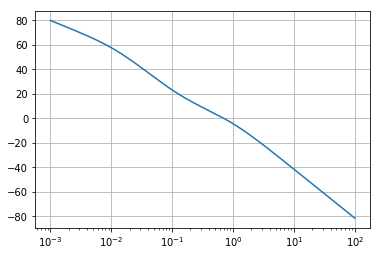

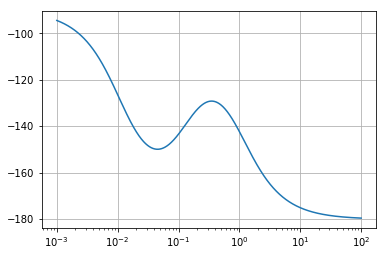

Presecna ucestanost pojacanja: 0.71
Fazna margina: 44.43


In [16]:
# Proveravamo sistem za C(s)=K*alpha*(s/z+1)/(s/p+1)=K(s+z)/(s+p)
W2=signal.lti([-z], [0, -1, -p], K)
w, mag, phase = signal.bode(W2,w=w_log)
plt.figure()
plt.grid()
plt.semilogx(w, mag)    # Bode amplitudska karakteristika
plt.figure()
plt.grid()
plt.semilogx(w, phase)  # Bode fazna karakteristika
plt.show()
# presecna ucestanost pojacanja za K=10
w1=w[mag[:]>=0][-1]
print("Presecna ucestanost pojacanja:",round(w1,2))
#fazna margina
PM=180+phase[mag[:]>=0][-1]
print("Fazna margina:",round(PM,2))

In [17]:
#Blizu smo trazenoj faznoj margini,pomeramo nulu jos malo ulevo:
z=w1/8
p=z/alpha
z,p

(0.088764339598013386, 0.0075864143617437587)

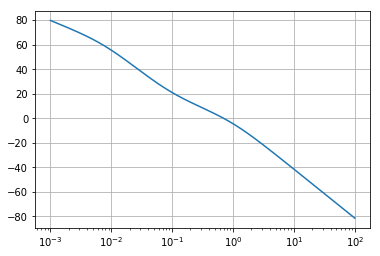

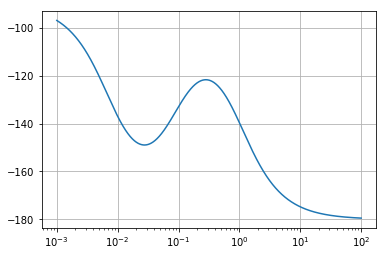

Presecna ucestanost pojacanja: 0.7
Fazna margina: 48.28


In [18]:
# Proveravamo sistem
W2=signal.lti([-z], [0, -1, -p], K)
w, mag, phase = signal.bode(W2,w=w_log)
plt.figure()
plt.grid()
plt.semilogx(w, mag)    # Bode amplitudska karakteristika
plt.figure()
plt.grid()
plt.semilogx(w, phase)  # Bode fazna karakteristika
plt.show()
# presecna ucestanost pojacanja za K=10
w1=w[mag[:]>=0][-1]
print("Presecna ucestanost pojacanja:",round(w1,2))
#fazna margina
PM=180+phase[mag[:]>=0][-1]
print("Fazna margina:",round(PM,2))

In [19]:
#d) Ispunjeni su kriterijumi za gore izabran kompenzator

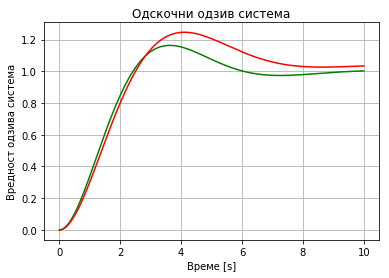

In [20]:
#d) Odredjujemo funkciju spregnutog prenosa G(s)=W(s)/1+W(s) , W(s)=K(s+z)/s(s+1)(s+p)

brojilac=[K, K*z]
imenilac1=sp.convolve(sp.convolve([1,0],[1,1]),[1,p])
imenilac=imenilac1+[0, 0, K, K*z]
G2=signal.lti(brojilac,imenilac)

G=signal.lti([1],[1, 1, 1])


t=np.linspace(0,10,1000)

tt,y1=G.step(T=t)
tt,y2=G2.step(T=t)
plt.plot(tt,y1,'g',tt,y2,'r')
plt.title("Одскочни одзив система")
plt.ylabel("Вредност одзива система")
plt.xlabel("Време [s]")
plt.grid()
plt.show()

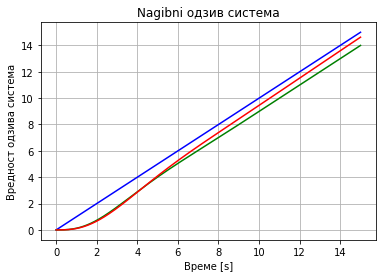

In [22]:
# Odzivi na jedinicne nagibne pobude
t=np.linspace(0,15,1000)
tt,y1,x1=signal.lsim(G,t,t)
tt,y2,x2=signal.lsim(G2,t,t)
plt.plot(tt,tt,'b',tt,y1,'g',tt,y2,'r')
plt.title("Nagibni одзив система")
plt.ylabel("Вредност одзива система")
plt.xlabel("Време [s]")
plt.grid()
plt.show()

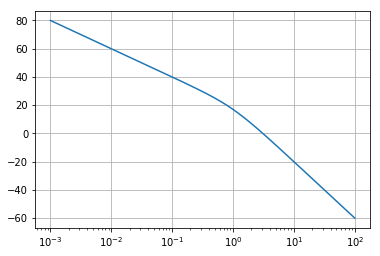

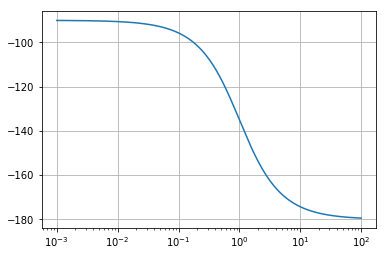

Presecna ucestanost pojacanja: 3.08
Fazna margina: 17.96


In [23]:
# c) II nacin: Kontroler C(s)=K_1*(s/z+1)/(s/p+1) , p=z/alpha 
#   Prvo biramo UKUPNO pojacanje K_1 (=K*alpha) koje zadovoljava trazenu brzinsku konstantu
K1=10
# Bodeov dijagram za K1*W(s):
W3=signal.lti([], [0, -1], K1)
w, mag, phase = signal.bode(W3,w=w_log)
plt.figure()
plt.grid()
plt.semilogx(w, mag)    # Bode amplitudska karakteristika
plt.figure()
plt.grid()
plt.semilogx(w, phase)  # Bode fazna karakteristika
plt.show()
# presecna ucestanost pojacanja za K=10
w1=w[mag[:]>=0][-1]
print("Presecna ucestanost pojacanja:",round(w1,2))
#fazna margina
PM=180+phase[mag[:]>=0][-1]
print("Fazna margina:",round(PM,2))

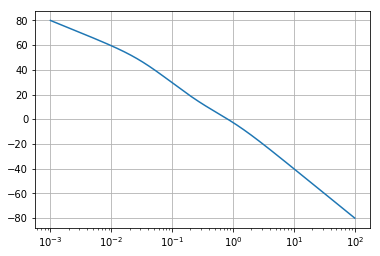

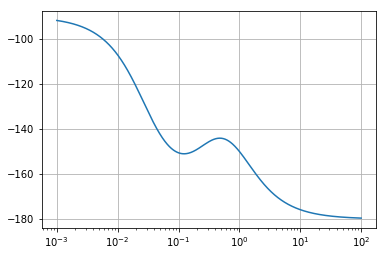

Presecna ucestanost pojacanja: 0.82
Fazna margina: 32.62


In [24]:
# Sada biramo pol i nulu tako da nam smanje presecnu ucestanost w1, po mogucstvu bez promene fazne karakteristike u okolini w1.
# Znaci treba da budu dovoljno manji od w1
# Probamo z=0.3 (za oko dekade manja nula od w1), alpha=10
z=0.3
alpha=10
p=z/alpha
# Proveravamo sistem za C(s)=K1*(s/z+1)/(s/p+1)=(K1/alpha)(s+z)/(s+p)
W4=signal.lti([-z], [0, -1, -p], K1/alpha)
w, mag, phase = signal.bode(W4,w=w_log)
plt.figure()
plt.grid()
plt.semilogx(w, mag)    # Bode amplitudska karakteristika
plt.figure()
plt.grid()
plt.semilogx(w, phase)  # Bode fazna karakteristika
plt.show()
# presecna ucestanost pojacanja za K=10
w1=w[mag[:]>=0][-1]
print("Presecna ucestanost pojacanja:",round(w1,2))
#fazna margina
PM=180+phase[mag[:]>=0][-1]
print("Fazna margina:",round(PM,2))

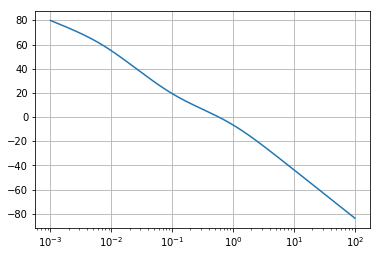

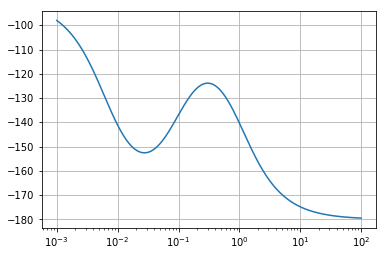

Presecna ucestanost pojacanja: 0.58
Fazna margina: 50.65


In [25]:
# Probamo z=0.1, alpha=15
z=0.1
alpha=15
p=z/alpha
# Proveravamo sistem za C(s)=K1*(s/z+1)/(s/p+1)=(K1/alpha)(s+z)/(s+p)
W4=signal.lti([-z], [0, -1, -p], K1/alpha)
w, mag, phase = signal.bode(W4,w=w_log)
plt.figure()
plt.grid()
plt.semilogx(w, mag)    # Bode amplitudska karakteristika
plt.figure()
plt.grid()
plt.semilogx(w, phase)  # Bode fazna karakteristika
plt.show()
# presecna ucestanost pojacanja za K=10
w1=w[mag[:]>=0][-1]
print("Presecna ucestanost pojacanja:",round(w1,2))
#fazna margina
PM=180+phase[mag[:]>=0][-1]
print("Fazna margina:",round(PM,2))

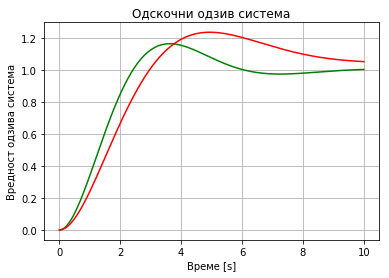

In [26]:
# odskocni odzivi G(s)=W(s)/1+W(s) , W(s)=(K1/alpha)(s+z)/s(s+1)(s+p)
K=K1/alpha
brojilac=[K, K*z]
imenilac1=sp.convolve(sp.convolve([1,0],[1,1]),[1,p])
imenilac=imenilac1+[0, 0, K, K*z]
G4=signal.lti(brojilac,imenilac)

G=signal.lti([1],[1, 1, 1])


t=np.linspace(0,10,1000)

tt,y1=G.step(T=t)
tt,y2=G4.step(T=t)
plt.plot(tt,y1,'g',tt,y2,'r')
plt.title("Одскочни одзив система")
plt.ylabel("Вредност одзива система")
plt.xlabel("Време [s]")
plt.grid()
plt.show()

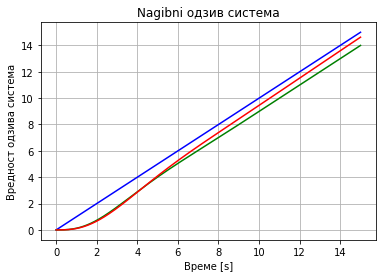

In [27]:
# Odzivi na jedinicne nagibne pobude
t=np.linspace(0,15,1000)
tt,y1,x1=signal.lsim(G,t,t)
tt,y2,x2=signal.lsim(G2,t,t)
plt.plot(tt,tt,'b',tt,y1,'g',tt,y2,'r')
plt.title("Nagibni одзив система")
plt.ylabel("Вредност одзива система")
plt.xlabel("Време [s]")
plt.grid()
plt.show()

In [ ]:
# vidimo da smo sada dobili sporiji sistem od G2, jer smo konzervativnije postavili pol i nulu
# tako da je presecna ucestanost w1 jos manja (uz vecu faznu marginu)

In [ ]:
#Zadatak 2:  Ponoviti prethodni zadatak za W(s)=1/(s/0.5+1)(s+1)(s/2+1) 
#             i specifikacije: fazna margina>40 stepeni, konstanta pojacanja K_p=9

In [ ]:
#Zadatak 3:  Ponoviti prethodni zadatak za W(s)=1/s(s/5+1)(s/50+1)
#             i specifikacije: fazna margina>40 stepeni, brzinska konstant K_v=150

In [ ]:
#Zadatak 4:  Ponoviti prethodni zadatak za W(s)=5000(s+4)/(s+1)(s^2+16s+100)(s+20)
#             i specifikacije: presecma ucestanost pojacanja w1=15 rad/s, konstanta pojacanja K_p=40